<a href="https://colab.research.google.com/github/little-hoge/PythonAI/blob/main/1%E6%97%A5%E7%9B%AE/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#### ファイルパス設定
---

In [ ]:
# ファイル読み込み
from google.colab import drive 
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/１日目"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/１日目


---
## ライブラリのインポート(前処理)
---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データ読み込み
credit_df = pd.read_csv('クレジット審査_学習用データ.csv')

---
#### 基本操作
---

In [ ]:
#データの先頭5行を確認、引数は表示したい行数
credit_df.head(5)

,当座預金口座,返済期間,信用履歴,目的,借入金額,普通預金口座,雇用状況,性別など,保証人など,資産,年齢,その他借入,住居,仕事,電話番号,審査結果
0,0DM未満,42,遅延なく返済中,家具など,7882,100DM未満,勤続4年以上7年未満,男性／独身,保証人,生命保険など,45.0,なし,家族と同居,正社員,登録あり,安全
1,200DM未満,48,遅延なく返済中,ラジオ／テレビ,5951,100DM未満,勤続1年以上4年未満,女性／離婚・別居・結婚,なし,不動産,22.0,なし,家主,正社員,NaN,リスクあり
2,0DM未満,24,遅延あり,新車,4870,100DM未満,勤続1年以上4年未満,男性／独身,なし,なし,53.0,なし,家族と同居,正社員,NaN,リスクあり
3,口座なし,36,遅延なく返済中,教育,9055,口座なし,勤続1年以上4年未満,男性／独身,なし,なし,35.0,なし,家族と同居,パート/アルバイト,NaN,安全
4,口座なし,24,遅延なく返済中,家具など,2835,500～1000DM,勤続7年以上,男性／独身,なし,生命保険など,53.0,なし,家主,正社員,NaN,安全


In [ ]:
# 件数表示
len(credit_df)

1525

In [ ]:
# 欠損値をカウント
credit_df.isnull().sum()

当座預金口座      0
返済期間        0
信用履歴        3
目的          9
借入金額        0
普通預金口座      0
雇用状況        4
性別など        5
保証人など      11
資産          0
年齢          5
その他借入       0
住居          3
仕事          2
電話番号      906
審査結果        0
dtype: int64

In [ ]:
# 1つの列にどのような種類のデータが入っているか確認
credit_df.groupby(['目的']).size()

目的
その他         20
ラジオ／テレビ    418
中古車        164
仕事         152
修理          32
再教育         12
家具など       264
家電          16
教育          76
新車         362
dtype: int64

In [ ]:
# データがない行を削除
credit_df = credit_df.dropna(subset=['信用履歴','雇用状況','性別など','年齢','住居','仕事'])

# 特定の列のデータを置換
credit_df = credit_df.fillna({'目的':'その他', '保証人など':'なし'})

# 欠損値を含む列を削除
credit_df = credit_df.dropna(how='any', axis=1)

# 欠損値確認
credit_df.isnull().sum()

当座預金口座    0
返済期間      0
信用履歴      0
目的        0
借入金額      0
普通預金口座    0
雇用状況      0
性別など      0
保証人など     0
資産        0
年齢        0
その他借入     0
住居        0
仕事        0
審査結果      0
dtype: int64

In [ ]:
# データの置き換え
credit_df['審査結果'] = credit_df['審査結果'].replace('安全', 0)
credit_df['審査結果'] = credit_df['審査結果'].replace('リスクあり', 1)

# 特定の行をOne-Hot-Encodingする。
pd.get_dummies(credit_df['仕事']).head()

,パート/アルバイト,正社員,無職,管理者/役員
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [ ]:
# 保存
credit_df.to_csv('output.csv', index=False)

---
#### モデル学習
---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 分割
from sklearn.model_selection import train_test_split

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ファイル読み込み
credit_df = pd.read_csv('credit_onehot.csv')

# 引数は表示したい行数
#credit_df.head(5)

# 欠損値確認
#credit_df.isnull().sum()

# 入力データと正解ラベルに分割
X = credit_df.iloc[:,:-1]
y = credit_df.iloc[:,-1]

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# ロジスティック回帰インスタンス
model = LogisticRegression(max_iter=500, random_state=0)

# 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# 出力値制限後、重み出力
np.set_printoptions(precision=2, suppress=True)
print("coefficient = ", model.coef_)

coefficient =  [[ 0.05 -0.   -0.01  0.77 -0.02  0.09 -1.11  0.47  0.2  -0.75 -0.04 -0.16
   0.03 -0.1  -0.92 -0.07  0.22 -0.14 -0.36  0.06  0.16  0.84 -0.04  0.42
   0.09  0.13 -0.87  0.14 -0.71  0.12  0.33 -0.15 -0.25 -0.1   0.02 -0.32
   0.37 -0.15 -0.39  0.26 -0.    0.35 -0.58 -0.04 -0.47  0.26 -0.07 -0.25
  -0.3   0.27  0.05 -0.13 -0.02 -0.17]]


In [ ]:
# データ確認
credit_df.head(len(credit_df))

,返済期間,借入金額,年齢,当座預金口座_0DM未満,当座預金口座_200DM以上または給与振込口座,当座預金口座_200DM未満,当座預金口座_口座なし,信用履歴_借金なし,信用履歴_当銀行の返済金なし,信用履歴_要注意人物,信用履歴_遅延あり,信用履歴_遅延なく返済中,目的_その他,目的_ラジオ／テレビ,目的_中古車,目的_仕事,目的_修理,目的_再教育,目的_家具など,目的_家電,目的_教育,目的_新車,普通預金口座_1000DM以上,普通預金口座_100DM未満,普通預金口座_100～500DM,普通預金口座_500～1000DM,普通預金口座_口座なし,雇用状況_勤続1年以上4年未満,雇用状況_勤続4年以上7年未満,雇用状況_勤続7年以上,雇用状況_勤続１年未満,雇用状況_失業中,性別など_女性／独身,性別など_女性／離婚・別居・結婚,性別など_男性／既婚・未亡人,性別など_男性／独身,性別など_男性／離婚・別居,保証人など_なし,保証人など_保証人,保証人など_連帯債務者,資産_その他資産,資産_なし,資産_不動産,資産_生命保険など,その他借入_なし,その他借入_消費者金融,その他借入_銀行,住居_家主,住居_家族と同居,住居_賃貸,仕事_パート/アルバイト,仕事_正社員,仕事_無職,仕事_管理者/役員,審査結果
0,42,7882,45.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
1,48,5951,22.0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,24,4870,53.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
3,36,9055,35.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,24,2835,53.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,30,8386,49.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1
1506,16,2625,43.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
1507,36,10477,42.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1508,6,14896,68.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1


In [ ]:
# 1件だけ予測
print("予測結果:",model.predict(X_test[:1]))

# 予測結果の確率を算出
print("予測結果の確率:",model.predict_proba(X_test[:1]))

予測結果: [0]
予測結果の確率: [[0.89 0.11]]


In [ ]:
# .scoreで正解率
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.7918637653736992
test score: 0.7262693156732892


In [ ]:
# 混同行列
from sklearn.metrics import confusion_matrix

# テスト用データの学習済みモデルが出す予測結果を取得
y_pred = model.predict(X_test)
y_pred = (model.predict_proba(X_test)[:, 0] < 0.38).astype(int)

# 混同行列を作成
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

# 混同行列を一次元配列化
tp, fn, fp, tn = c_matrix.flatten()
print("真陽性（TP: True Positive）   偽陰性（FN: False Negative） ") 
print(tp, "                         ", fn) 
print("偽陽性（FP: False Positive）  真陰性（TN: True Negative） ") 
print(fp, "                          ", tn) 

[[300  22]
 [ 94  37]]
真陽性（TP: True Positive）   偽陰性（FN: False Negative） 
300                           22
偽陽性（FP: False Positive）  真陰性（TN: True Negative） 
94                            37


In [ ]:
# 正確度、適合度、再現度、F1スコア
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 正確度（正解率）を算出　(TP + TN) / 全体
accuracy = accuracy_score(y_test, y_pred)

# 適合度を算出　TP / (TP + FP)
precision = precision_score(y_test, y_pred)

# 再現度を算出　TP / (TP + FN)
recall = recall_score(y_test, y_pred)

#F1スコアを算出 (2 - 適合度 × 再現度) / (適合度 × 再現度)
f1 = f1_score(y_test, y_pred)

print("正確度（Accuracy）    適合度（Precision） ") 
print(accuracy, "  ", precision) 
print("再現度（Recall）      F1スコア（F1） ") 
print(recall, " ", f1) 

正確度（Accuracy）    適合度（Precision） 
0.7439293598233996    0.6271186440677966
再現度（Recall）      F1スコア（F1） 
0.2824427480916031   0.3894736842105263


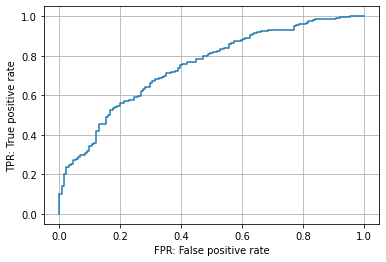

In [ ]:
# ROC曲線
from sklearn.metrics import roc_curve, roc_auc_score

#テスト用データの学習済みモデルが出す予測結果の確率を取得
y_prob = model.predict_proba(X_test)

#FPR(偽陽性率)、TPR(真陽性率・再現率)を算出
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,0], pos_label=0)

#FPRとTPRをグラフにプロット
plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

---
#### 演習：ロジスティック回帰→ニューラルネットワークに修正
---

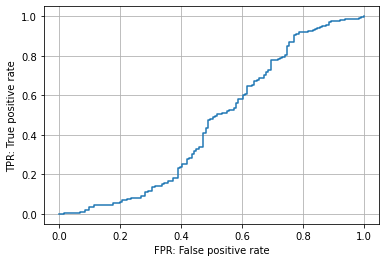

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ROC曲線
from sklearn.metrics import roc_curve, roc_auc_score

# 分割
from sklearn.model_selection import train_test_split

# ロジスティック回帰
#from sklearn.linear_model import LogisticRegression
# ニューラルネットワーク
from sklearn.neural_network import MLPClassifier

# ファイル読み込み
credit_df = pd.read_csv('credit_onehot.csv')

# 引数は表示したい行数
#credit_df.head(5)

# 欠損値確認
#credit_df.isnull().sum()

# 入力データと正解ラベルに分割
X = credit_df.iloc[:,:-1]
y = credit_df.iloc[:,-1]

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# ニューラルネットワークインスタンス
model = MLPClassifier(max_iter=500, random_state=0)

# 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# 出力値制限後、重み出力
#np.set_printoptions(precision=2, suppress=True)
#print("coefficient = ", model.coef_)

#テスト用データの学習済みモデルが出す予測結果の確率を取得
y_prob = model.predict_proba(X_test)

#FPR(偽陽性率)、TPR(真陽性率・再現率)を算出
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,0], pos_label=0)

#FPRとTPRをグラフにプロット
plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

---
#### 演習：ロジスティック回帰→決定木(DecisionTreeClassifier)に修正
---

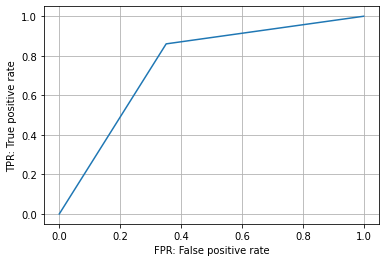

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ROC曲線
from sklearn.metrics import roc_curve, roc_auc_score

# 分割
from sklearn.model_selection import train_test_split

# ロジスティック回帰
#from sklearn.linear_model import LogisticRegression
# 決定木(DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

# ファイル読み込み
credit_df = pd.read_csv('credit_onehot.csv')

# 引数は表示したい行数
#credit_df.head(5)

# 欠損値確認
#credit_df.isnull().sum()

# 入力データと正解ラベルに分割
X = credit_df.iloc[:,:-1]
y = credit_df.iloc[:,-1]

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# 決定木インスタンス
model = DecisionTreeClassifier()

# 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# 出力値制限後、重み出力
#np.set_printoptions(precision=2, suppress=True)
#print("coefficient = ", model.coef_)

#テスト用データの学習済みモデルが出す予測結果の確率を取得
y_prob = model.predict_proba(X_test)

#FPR(偽陽性率)、TPR(真陽性率・再現率)を算出
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,0], pos_label=0)

#FPRとTPRをグラフにプロット
plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

---
#### 演習：ロジスティック回帰→サポートベクターマシン(SVM)に修正
---

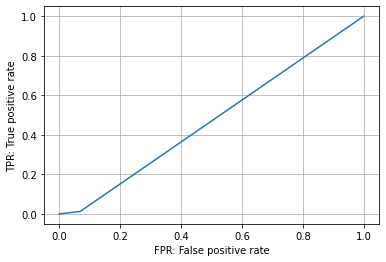

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ROC曲線
from sklearn.metrics import roc_curve, roc_auc_score

# 分割
from sklearn.model_selection import train_test_split

# ロジスティック回帰
#from sklearn.linear_model import LogisticRegression
# サポートベクターマシン(SVM)
from sklearn.svm import SVC

# ファイル読み込み
credit_df = pd.read_csv('credit_onehot.csv')

# 引数は表示したい行数
#credit_df.head(5)

# 欠損値確認
#credit_df.isnull().sum()

# 入力データと正解ラベルに分割
X = credit_df.iloc[:,:-1]
y = credit_df.iloc[:,-1]

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# サポートベクターマシン(SVM)
model = SVC()

# 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# 出力値制限後、重み出力
#np.set_printoptions(precision=2, suppress=True)
#print("coefficient = ", model.coef_)

#テスト用データの学習済みモデルが出す予測結果の確率を取得
y_prob = model.predict(X_test)

#FPR(偽陽性率)、TPR(真陽性率・再現率)を算出
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:], pos_label=0)

#FPRとTPRをグラフにプロット
plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()